#  Fourier Analysis for Time Series Prediction
Fast Fourier Transform is an extremely powerful tool which can be used to make predictions of future data for datasets that exhibit periodic behaviour in time. With the use of the Fast Fourier Transform algorithm, we have managed to sucessfullly predict future data for real-life dataset with weather data, from years 2015-2020. This notebook takes you step-by-step throught the process we have used, and present our findings. 

#### Note: Please make sure to Restart and Run all before proceeding!



This project uses Jupyter Notebooks with pandas and numpy libraries, which are powerful data science libraries for python. We first import all the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from numpy import fft       # import fast fourier transform algorithm

We have decided to use a weather dataset stored in file `all_data.csv` that was provided to all 1st year student, by the responsible lecturers for 2AIBO "Data Analytics for Engineers" course. The dataset contains hourly data from a number of Ducth weater stations across the country for years 2015-2020. For this project, temperature data will be analyzed.

## Loading and preparing weather data for analysis:

In [2]:
df_data = pd.read_csv('all_data.csv', 
                      header=[0, 1],
                      parse_dates=[0],
                      index_col=[0])
df_data.index = df_data.index.tz_convert('Europe/Amsterdam')

In [3]:
df_data = df_data['weather'].copy()

In [4]:
df_data['date_part'] = df_data.index.floor('D')
df_data['year'] = df_data.index.year
df_data['month'] = df_data.index.month
df_data['weekday'] = df_data.index.weekday
df_data['hour'] = df_data.index.hour
df_data['day_of_year'] = df_data.index.dayofyear
df_data['week'] = df_data['day_of_year'] // 7 + 1
df_data.head()

station_number,station_number,wind_direction_degrees,average_wind_speed(m/s),wind_speed_previous_hour(m/s),highest_wind_gust(m/s),temperature (degreesC),minimum_temp_10cm(degreesC),dew_point_temperature(degreesC),sunshine(hr),general radiation(j/cm2),...,snow,storm,ice,date_part,year,month,weekday,hour,day_of_year,week
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,260.0,210.0,4.0,4.0,6.0,2.6,1.6,0.7,0.0,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00+01:00,2015,1,3,0,1,1
2015-01-01 01:00:00+01:00,260.0,210.0,4.0,4.0,6.0,2.4,NaN,0.5,0.0,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00+01:00,2015,1,3,1,1,1
2015-01-01 02:00:00+01:00,260.0,200.0,4.0,4.0,6.0,2.2,NaN,-0.3,0.0,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00+01:00,2015,1,3,2,1,1
2015-01-01 03:00:00+01:00,260.0,200.0,4.0,4.0,7.0,1.6,NaN,-0.3,0.0,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00+01:00,2015,1,3,3,1,1
2015-01-01 04:00:00+01:00,260.0,220.0,4.0,3.0,8.0,1.3,NaN,-0.4,0.0,0.0,...,0.0,0.0,0.0,2015-01-01 00:00:00+01:00,2015,1,3,4,1,1


The idea of this part of the project is to use temperature data from 2015-2019, to predict temperatures for 2020. All the data can be viewed in the table below cell 12.

In [5]:
df_temp_all = df_data.groupby(['year','day_of_year']).mean()             # compute average daily temperatures for all years

In [6]:
df_temp_all.head()

station_number    station_number  wind_direction_degrees  \
year day_of_year                                           
2015 1                     260.0              202.083333   
     2                     260.0              257.083333   
     3                     260.0              237.916667   
     4                     260.0              266.666667   
     5                     260.0              195.833333   

station_number    average_wind_speed(m/s)  wind_speed_previous_hour(m/s)  \
year day_of_year                                                           
2015 1                           5.208333                       5.208333   
     2                           6.250000                       6.250000   
     3                           3.333333                       3.250000   
     4                           2.333333                       2.333333   
     5                           3.000000                       3.083333   

station_number    highest_wind_gust(m/s)  temperature (degreesC)  \
year day_of_year                                                   
2015 1                          9.000000                2.891667   
     2                         12.083333                7.208333   
     3                          6.208333                3.904167   
     4                          4.875000                4.004167   
     5                          5.458333                2.316667   

station_number    minimum_temp_10cm(degreesC)  \
year day_of_year                                
2015 1                                  1.425   
     2                                  5.000   
     3                                  3.375   
     4                                  0.550   
     5                                 -0.150   

station_number    dew_point_temperature(degreesC)  sunshine(hr)  \
year day_of_year                                                  
2015 1                                  -0.441667      0.116667   
     2                                   2.312500      0.183333   
     3                                   1.787500      0.000000   
     4                                   0.770833      0.237500   
     5                                   0.791667      0.020833   

station_number    general radiation(j/cm2)  ...  weather_code_observer  fog  \
year day_of_year                            ...                               
2015 1                            8.875000  ...               5.583333  0.0   
     2                           13.625000  ...               5.916667  0.0   
     3                            2.791667  ...               6.083333  0.0   
     4                           15.500000  ...               5.750000  0.0   
     5                            5.291667  ...               6.833333  0.0   

station_number        rain  snow  storm  ice  month  weekday  hour  week  
year day_of_year                                                          
2015 1            0.000000   0.0    0.0  0.0    1.0      3.0  11.5   1.0  
     2            0.375000   0.0    0.0  0.0    1.0      4.0  11.5   1.0  
     3            0.416667   0.0    0.0  0.0    1.0      5.0  11.5   1.0  
     4            0.208333   0.0    0.0  0.0    1.0      6.0  11.5   1.0  
     5            0.000000   0.0    0.0  0.0    1.0      0.0  11.5   1.0  

[5 rows x 27 columns]

The data has been plotted on a figure below:

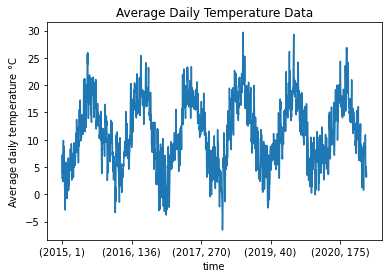

In [7]:
graph = df_temp_all["temperature (degreesC)"].plot()
graph.set_xlabel('time')
graph.set_ylabel('Average daily temperature' + ' $\degree$' + 'C')
graph.set_title("Average Daily Temperature Data");

Now we prepare the data for the next steps, which is fourier analysis. We create an array `x`, which will contain all the daily average temperatures. Then we isolate `x_train` and find it's size `n` which we will need later

In [8]:

x = np.array(df_temp_all["temperature (degreesC)"] )

#isolates only the training data
x_train = x[0: x.size -366]
n = x_train.size 


## Cleaning the data for better visualization
We would also like to visualize the temperature data without so much noise, so we will apply a fourier-based filter on it:

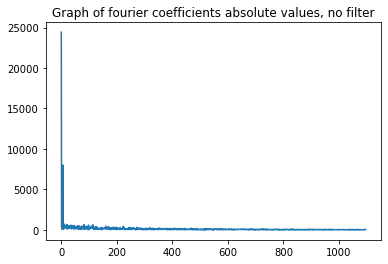

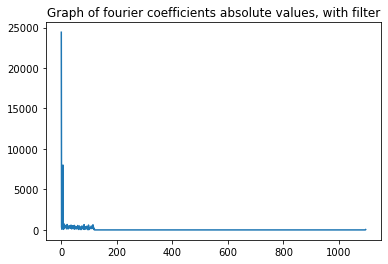

In [9]:
# creating a fourier transform of the data
yf = fft.rfft(x) 

#plotting the absolute value of the fourier transform
plt.plot(np.abs(yf))
plt.title("Graph of fourier coefficients absolute values, no filter")

#the % amount of the data we want to filter out, starting from the highest frequency 
percent_filter = 0.89

#applying the filter on the data
yf[int(yf.size-yf.size*percent_filter): yf.size-1] = 0 

#plotting the absolute value of the filtered fourier transform
plt.show()
plt.plot(np.abs(yf))
plt.title("Graph of fourier coefficients absolute values, with filter");



We would now like to move to the time domain again and split the data into a training and testing data

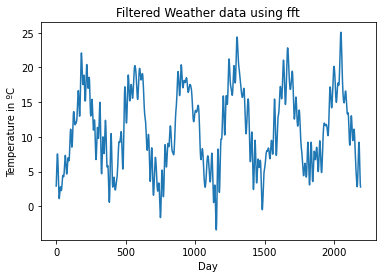

In [10]:
#moving into the time domain with reverse fourier 
x_clean = fft.irfft(yf)

#deviding the clean data into 2 sets
x_clean_train = x_clean[0: x_clean.size -366] 
x_clean_test  = x_clean[x_clean.size -367: x_clean.size -1]


#plotting all of the data
plt.plot(x_clean)
plt.xlabel("Day")
plt.ylabel("Temperature in ºC")
plt.title("Filtered Weather data using fft");



## Analysis
We also need to define the number of harmonics `harmonics` to use in our model. To mimic the real data with our fourier series as well as possible, we will compute the `n` coefficeients of the fourier series. Of course, the number of harmonics means the number of fourier coefficients, so the greater the number, the more accurste the predicion is. 

In [11]:
harmonics = n                     # number of harmonics in model

Let us define a `fourier_extrapolate` which will use the fft algorithm to predict future data, based on the data that is fed to the function. 

The time series is first detrended, by plotting a polynomial regression for the dataset. For every data point, the detrended values are the difference between the point and the polynomial regression value for that point, and stored in array `x_no_trend`. 

Then, the Fast fourier transform is computed on `x_no_trend` to get the fourier coefficients (frequencies in frequency domain) `x_freqs`.  

We now proceed to recomputing the data and predicting. We create a sorted list of indices `indices`, that will allow as to itterate through the fourier coefficients.

When iterating through coefficients, we compute the phase and amplitude of the complex signal. We also compute a sum of a number of cosine waves of diffferent frequency, so basically we are computing the inverse fourier series, to go back t the time domain.




In [12]:
def fourier_extrapolate(x, n_predict):

    t = np.arange(n)
    fit = np.polyfit(t, x, 1)          # finding a linear trend in x
    x_no_trend = x - fit[0] * t        # detrending x
    x_freqs = fft.fft(x_no_trend)      # detrending x in the frequency domain
    f = fft.fftfreq(n)                 # obtaining list of frequency values

    indices = list(range(0,n))
    indices.sort(key = lambda i: np.absolute(f[i]))     # sorting indexes by frequency from lower to higher
    t = np.arange(n + n_predict)       # new number of time points. number of data points + number of days to predict
    new_signal = np.zeros(t.size)      # initially flushing the new signal with bunch of zeros
    
    for i in indices[:1 + harmonics * 2]:            # Iterating through x_freqs to go back to time domain
        amplitude = np.absolute(x_freqs[i]) / n       
        phase = np.angle(x_freqs[i])              
        new_signal += amplitude * np.cos(2 * np.pi  * t * f[i] + phase) # computing sum of cosine waves for all frequencies
        
    return new_signal + fit[0] * t

Let's now define the number of days in the future `n_predict`, we want to predict the data for:


In [13]:
n_predict = 366

The predicted data:

In [14]:
extrapolation = fourier_extrapolate(x_train, n_predict)
extrapolation.size

2192

## Results
The data is now visualized. Let's see what the results are:

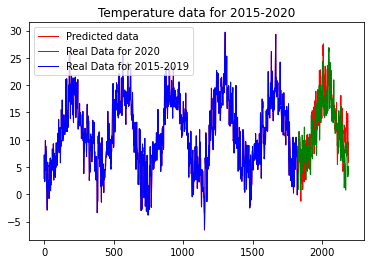

In [15]:
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'Predicted data', linewidth = 1)

y = np.array(df_temp_all["temperature (degreesC)"] )
y_2020 = y[y.size -367: y.size -1]
y_2019 = y[0: y.size -366] 
pl.plot(np.arange(1826, 1826 + y_2020.size), y_2020, 'g', label = 'Real Data for 2020', linewidth = 1)
pl.plot(np.arange(0, y_2019.size), y_2019, 'b', label = 'Real Data for 2015-2019', linewidth = 1)
pl.title("Temperature data for 2015-2020")

pl.legend()
pl.show()

Let us look at 2020 in more detail.

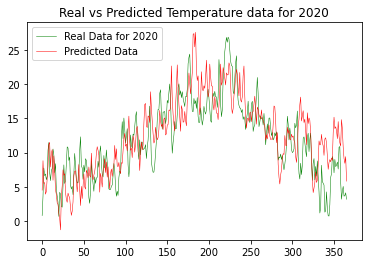

In [16]:
prediction = extrapolation[-366:]

df_2020 = df_data[(df_data['year'] == 2020)]               
df_2020 = df_2020.groupby(['year','day_of_year']).mean()    
real_2020_data = np.array(df_2020["temperature (degreesC)"])

pl.plot(np.arange(0, real_2020_data.size), real_2020_data, 'g', label = 'Real Data for 2020', linewidth = 0.5)
pl.plot(np.arange(0, prediction.size), prediction, 'r', label = 'Predicted Data', linewidth = 0.5)
pl.title("Real vs Predicted Temperature data for 2020")

pl.legend()
pl.show()

Let us now use the filtered data to predict the general trend of 2020:

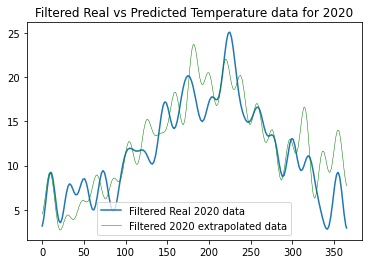

In [17]:
# preparing filtered extrapolation data by extrapolating data which has beeen already filtered.
extrapolation_filtered = fourier_extrapolate(x_clean_train, n_predict)
prediction_filtr = extrapolation_filtered[-366:]

# plotting data
pl.plot(x_clean_test, label = 'Filtered Real 2020 data')
pl.plot(np.arange(0, prediction_filtr.size),prediction_filtr, 'g', label = 'Filtered 2020 extrapolated data', linewidth = 0.5)
pl.title("Filtered Real vs Predicted Temperature data for 2020")
pl.legend()
pl.show()

One can see that the general trends are pretty well represented, however 
individual values are of course a bit off, as it is just a model.
Now we will investigate, by how much the predictions differ from real data.

## Assesing the Acuracy of the Model
In order to check how accurae the prediction is, The real data for 2020 will be compared to the predicted values. The mean absolute error will be computed, to have a numerical value describing the error. We will create a new Data Frame with the data for 23020. We also define a function find_error that calculates the average absolute error of the entire dataset.

In [18]:
results = pd.DataFrame()
results['Real Values'] = df_2020["temperature (degreesC)"]
results['Predicted Values'] = np.array(prediction)
results['Absolute error'] =abs(results['Real Values'] - results['Predicted Values'])
results

Real Values  Predicted Values  Absolute error
year day_of_year                                               
2020 1               0.820833          4.518113        3.697279
     2               3.641667          8.834779        5.193113
     3               7.750000          5.530613        2.219387
     4               6.645833          5.630613        1.015221
     5               6.887500          3.943113        2.944387
...                       ...               ...             ...
     362             5.079167         10.768113        5.688946
     363             3.650000          9.138946        5.488946
     364             3.725000          8.443113        4.718113
     365             4.145833          9.422279        5.276446
     366             3.200000          5.838946        2.638946

[366 rows x 3 columns]

In [19]:
average_2020_temp = sum(results['Real Values']) / len(results['Real Values'])
average_predicted_temp = sum(results['Predicted Values']) / len(results['Predicted Values'])
print("Mean predicted temperature is: {:0.2f}ºC."
      ", while the real mean temperature in 2020 was: {:1.2f}ºC.".format(average_predicted_temp, average_2020_temp))

Mean predicted temperature is: 12.51ºC., while the real mean temperature in 2020 was: 11.69ºC.


In [20]:
abs_error = abs(average_2020_temp-average_predicted_temp)
percent_error = abs_error / average_2020_temp * 100
print("The error in predicted mean yearly temperature for 2020 is {:0.2f}ºC.".format(abs_error))
print("This results in yearly percent error of {:0.2f}%".format(percent_error))

The error in predicted mean yearly temperature for 2020 is 0.82ºC.
This results in yearly percent error of 7.02%


For daily predictions, the results are significantly worse:

In [21]:
mean_error = sum(results['Absolute error']) / len(results['Absolute error'])
mean_percent_error = mean_error / average_2020_temp * 100
print("Mean daily error is: {:0.2f}ºC. Percent daily error is: {:1.2f} %".format(mean_error, mean_percent_error))

Mean daily error is: 3.16ºC. Percent daily error is: 27.05 %


## Evaluation, Reflection and Conclusion
Our aim with the project was to create a model that not only understand the past data but also to predict time series data. To do this several steps were taken. First the data was loaded and cleaned using fourier and selecting the coefficients and then selected the data that will be used to predict and the one that will be used to compare with the prediction. Afterwards, it was defined the function that would be used to extrapolate the data and obtain the predicted values by linear approximating the data, then use fourier to turn the data from time to frequency domain and computing the sum of the cosine waves for all frequencies. Finally, the results were analyzed to understand the model.

As it can be seen, the fourier transform can be effectively used as a simple-to-use tool, to filter and predict time series data. For ther dataset chosen, the daily scale predictions do deviate from the real values significantly,namely by 3.16 degrees on average, however the general trend is pretty well covered with the absolute error in annual mean temperature of only 0.82 degrees. Percentage errors did not dissapoint us as well, and are actually pretty low, baring in mind the simplicity of the model.

A further investigation could look into the influence of choosing different training data interval size, and how it influences the accuracy of the prediction. One could also investigate how the accuracy changes with time, as the more we predict into the future, the more the results will deviate from reality. Another great idea is to vary the periodicity of the data, and see how well the same model will behave. One might be really tempted to see how this analysis will perform on other types of time series data like for example financial instruments prices (stocks, bonds, cryptocurrency etc). 

Overall, we are happy with the results of the experiment, and we believe that fourier analysis to predict time series data can be used as a valid tool to do that. 

## Authors
Mikolaj Kahl: 1553593

Atanas Dzurkhov: 1628283

Igor Elvas: 1636820